In [149]:
# tools
import pandas as pd
import seaborn as sns
# plot
from matplotlib import pyplot as plt
# functions
from pathlib import Path

In [150]:
clicks = Path('../data/raw/clicks.csv.gzip')
clicks = pd.read_csv(clicks, compression='gzip')

In [151]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [152]:
clicks.source_id.value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

In [174]:
cols = ['timeToClick', 'touchX', 'touchY', 'brand']
xys = clicks[cols].dropna()

In [175]:
def time_to_category(t):
    if t <= 60:
        return 0 if t <=30 else 1
    return 2

def area_assignment(y):
    if y < 2.65:
        return 0 if y < 1 else 1
    return 2

In [176]:
xys = xys.assign(group = lambda df: df.timeToClick.map(time_to_category),
                 area  = lambda df: df.touchY.map(area_assignment))

In [177]:
xys.head()

,timeToClick,touchX,touchY,brand,group,area
9,1.707,0.466,0.985,1.0,0,0
13,1.245,0.244,0.458,1.0,0,0
15,3287.596,0.317,0.125,3.0,2,0
17,0.430,0.096,0.333,4.0,0,0
21,1.886,0.891,0.030,1.0,0,0


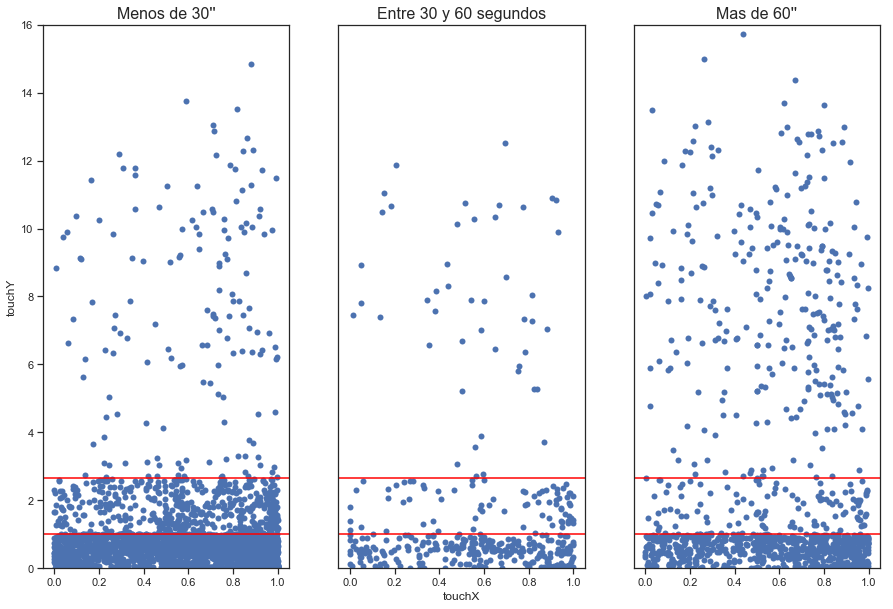

In [178]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,10))
sns.scatterplot('touchX', 'touchY', data=xys.query("group==0"), linewidth=0, ax=ax0)
sns.scatterplot('touchX', 'touchY', data=xys.query("group==1"), linewidth=0, ax=ax1)
sns.scatterplot('touchX', 'touchY', data=xys.query("group==2"), linewidth=0, ax=ax2)

axes = [ax0, ax1, ax2]

[ax.set_ylim([0, 16]) for ax in axes];
[ax.axhline(1, 0, 1, color='red') for ax in axes];
[ax.axhline(2.65, 0, 1, color='red') for ax in axes];

ax0.set_title('Menos de 30\'\'', size=16)
ax1.set_title('Entre 30 y 60 segundos', size=16)
ax2.set_title('Mas de 60\'\'', size=16)

ax0.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.get_yaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

plt.savefig('../assets/spatial_clicks.png')
plt.savefig('../assets/spatial_clicks.svg')
plt.show()

In [232]:
table = (xys.groupby(['group', 'area']).size()
            .to_frame('count').reset_index()
            .pivot(index='group', columns='area', values='count')
            .apply(lambda x: x/x.sum(), axis=1))
table

area,0,1,2
group,,,
0,0.838209,0.122703,0.039089
1,0.679688,0.200521,0.119792
2,0.657848,0.100529,0.241623


(1.07, 1.072)

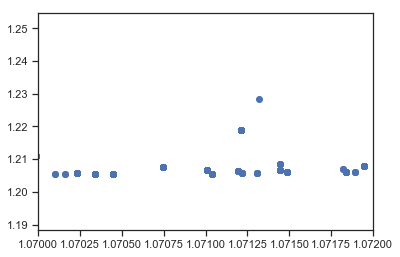

In [242]:
fig, ax = plt.subplots(1,1)
plt.scatter(clicks.longitude, clicks.latitude)
ax.set_xlim(1.07,1.072)
